In [6]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta 
import glob
import os
%matplotlib inline



In [7]:
# Set up input folder
data_folder = '../../data/kangaroopt2'

# Check if folder exists
if os.path.exists(data_folder):
    print(f"Data folder exists: {data_folder}")
else:
    print(f"Warning: Data folder does not exist: {data_folder}")
    
# Get all CSV files in the data folder
csv_files = glob.glob(os.path.join(data_folder, 'SPIT_*.csv'))

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()



Data folder exists: ../../data/kangaroopt2


Reading file: ../../data/kangaroopt2/SPIT_2024_09_06_11H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_08_05H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_07_22H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_08_12H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_11_14H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_11_07H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_09_02H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_06H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_06_15H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_06_23H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_09_12H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_06_10H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_09_16H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_16H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_03H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_11_01H.csv
Reading file: ../../data

/tmp/ipykernel_74691/4252896910.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
/tmp/ipykernel_74691/4252896910.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
/tmp/ipykernel_74691/4252896910.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Tim

Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_08H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_09_19H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_11_06H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_08_02H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_09_04H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_18H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_08_19H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_07_02H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_08_06H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_11H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_10_02H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_09_00H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_06_18H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_11_15H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_05_16H.csv
Reading file: ../../data/kangaroopt2/SPIT_2024_09_06_02H.csv
Reading file: ../../data

/tmp/ipykernel_74691/4252896910.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
/tmp/ipykernel_74691/4252896910.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
/tmp/ipykernel_74691/4252896910.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Tim

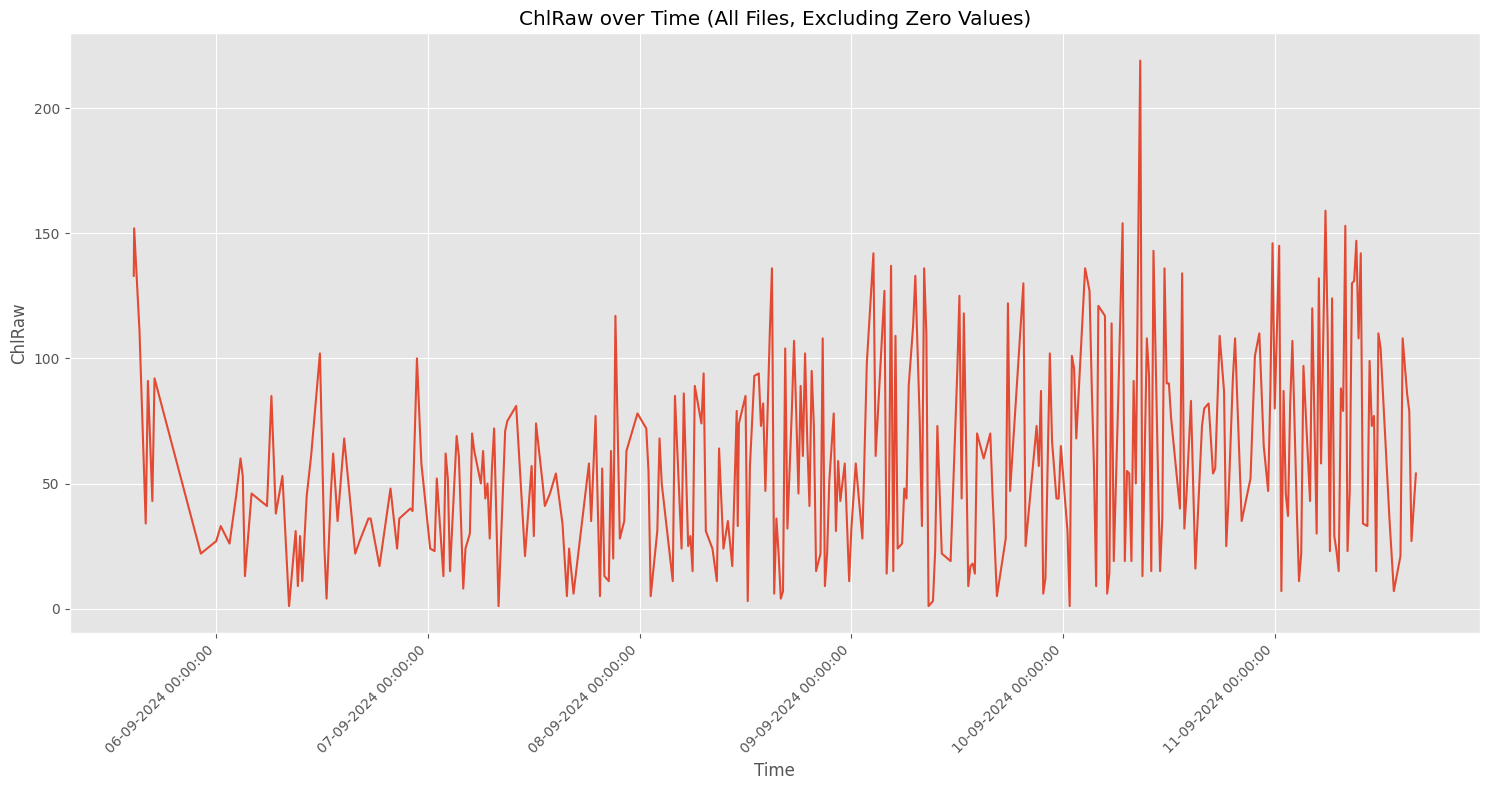

Graph created for ChlRaw


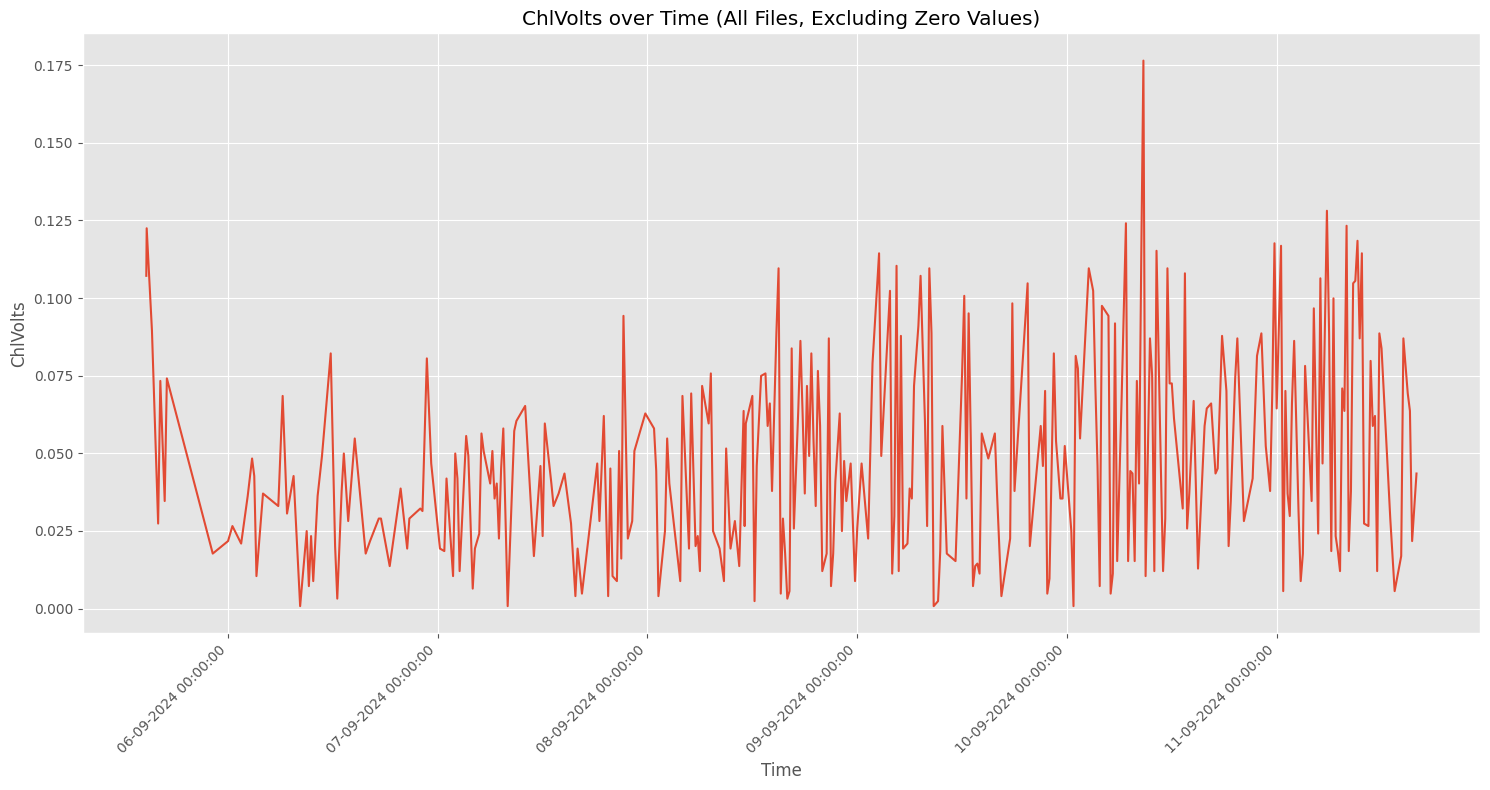

Graph created for ChlVolts


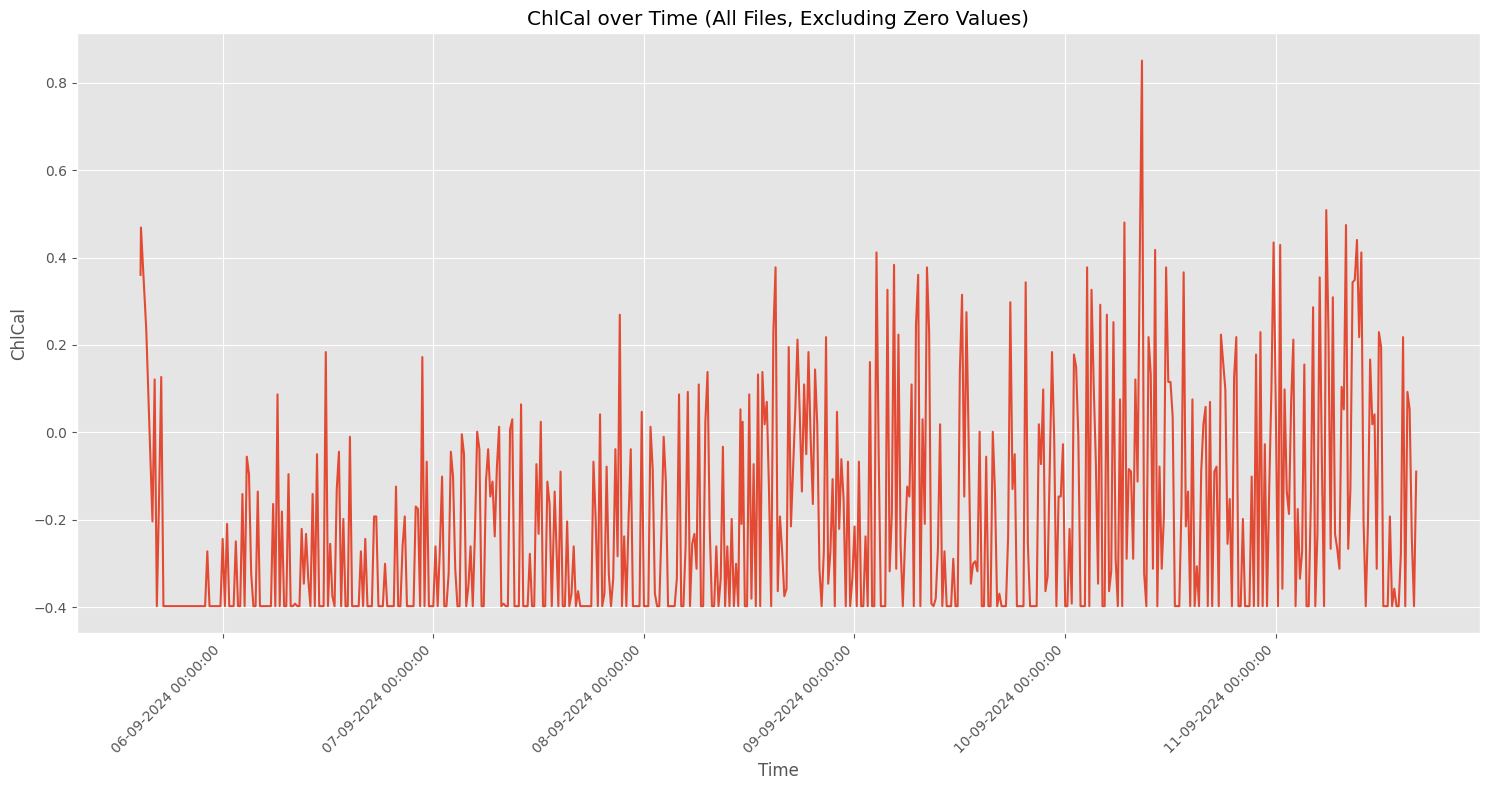

Graph created for ChlCal
No non-zero values to plot for CDOMRaw
No non-zero values to plot for CDOMVolts
No non-zero values to plot for CDOMCal
No non-zero values to plot for CDOMChlEQ


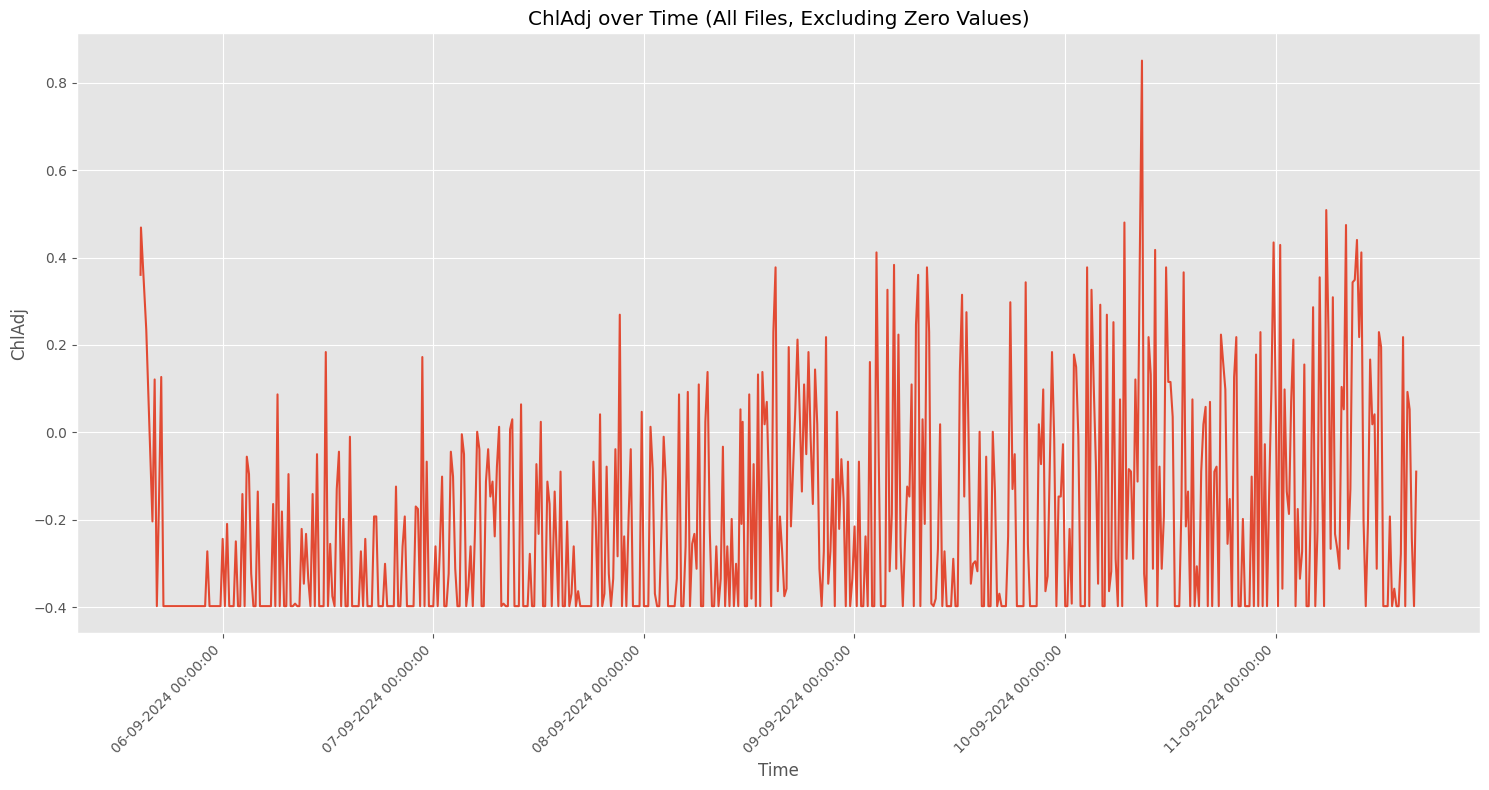

Graph created for ChlAdj


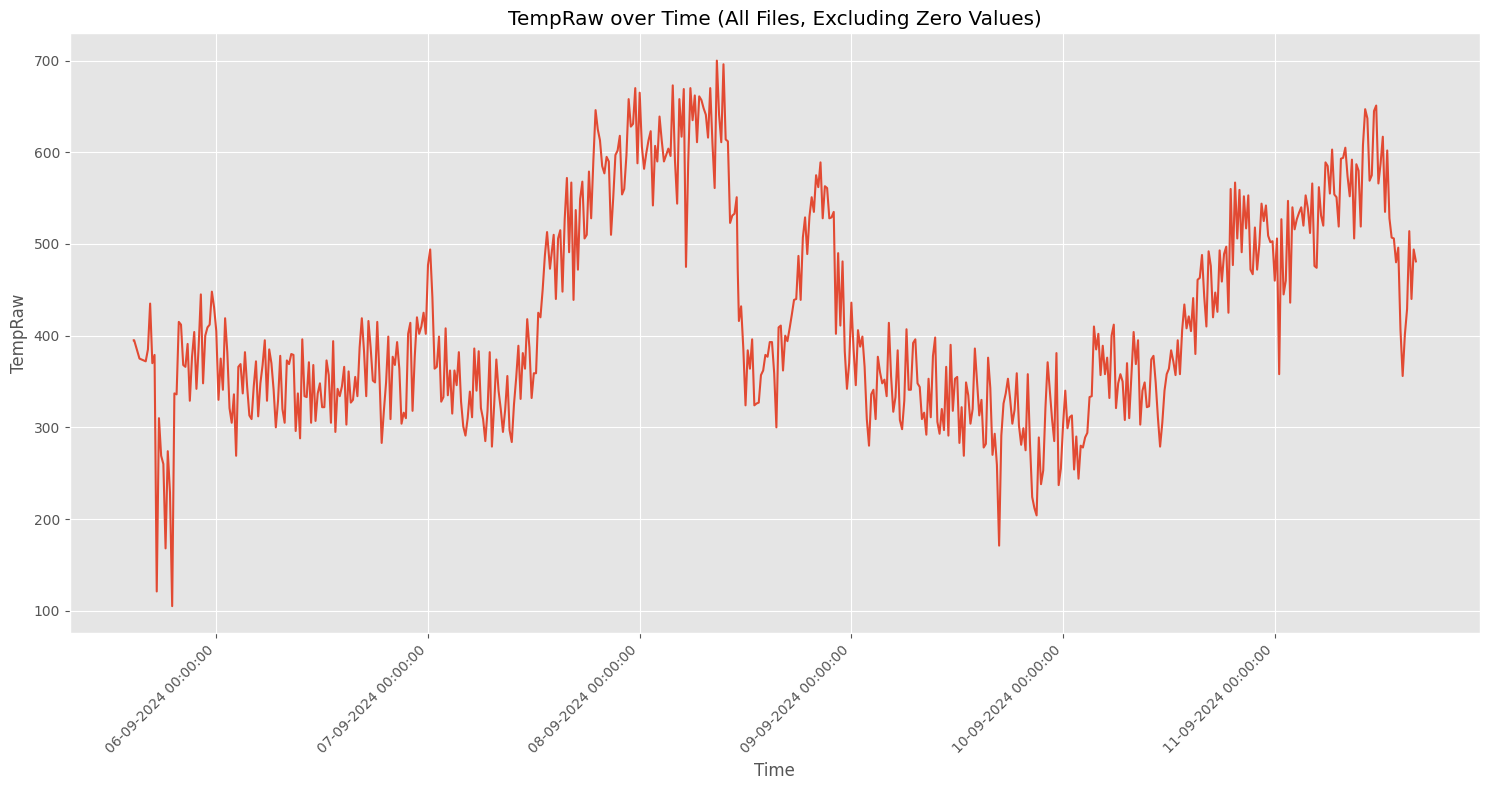

Graph created for TempRaw


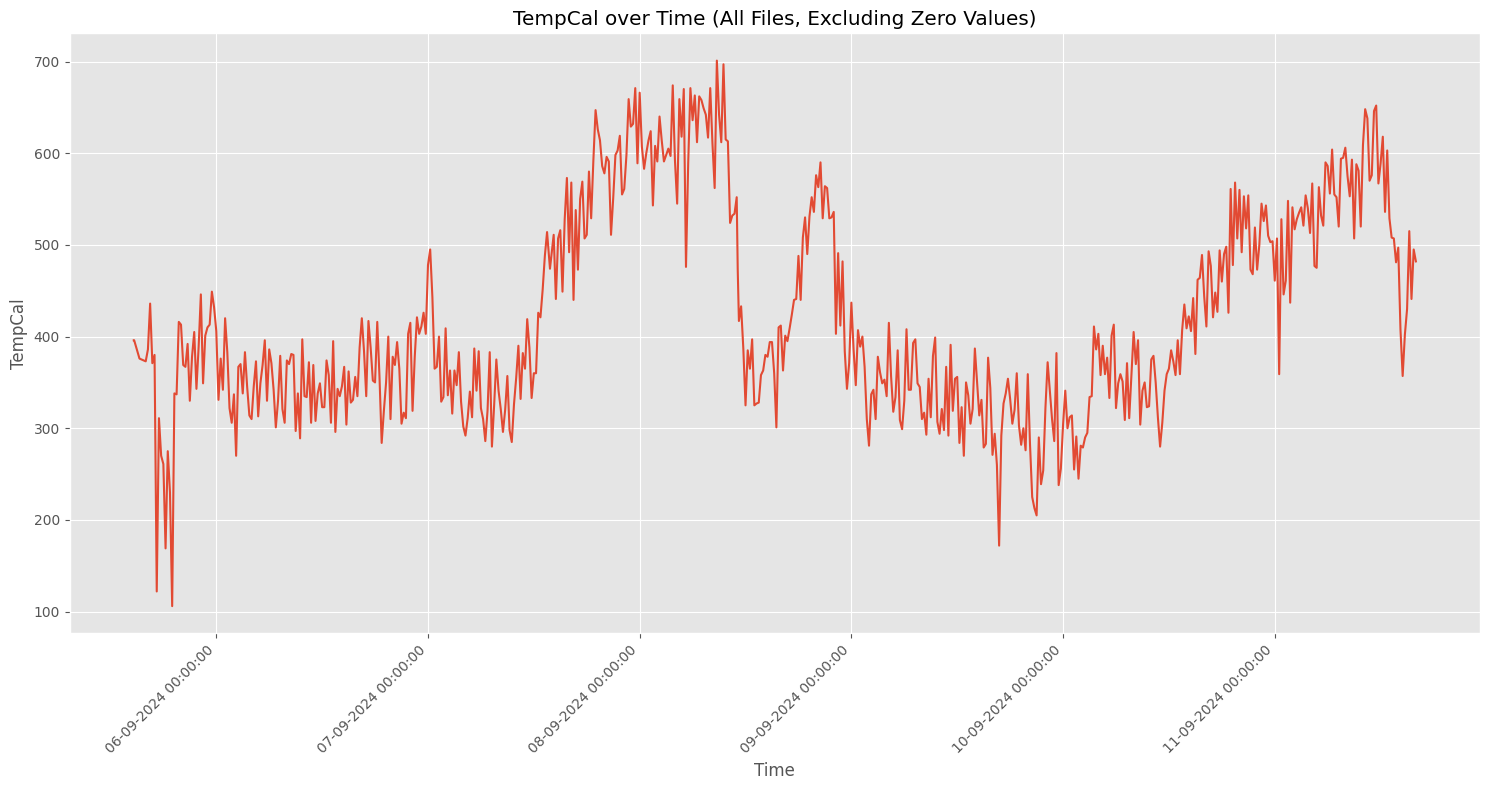

Graph created for TempCal
All variables processed. Graphs are displayed above.


In [8]:
# Read and combine all CSV files
for file_path in csv_files:
    print(f"Reading file: {file_path}")
    df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
    all_data = pd.concat([all_data, df], ignore_index=True)


# Sort the combined data by Time
all_data = all_data.sort_values('Time')

# Get list of all columns except 'Time'
columns_to_plot = [col for col in all_data.columns if col != 'Time']

# Create graphs for each variable
for column in columns_to_plot:
    if not all_data[column].eq('Fail').all():
        # Convert to numeric, replacing non-numeric values with NaN
        numeric_data = pd.to_numeric(all_data[column], errors='coerce')
        
        # Filter out 0 and NaN values
        mask = (numeric_data != 0) & (~numeric_data.isna())
        
        if mask.any():  # Only plot if there are non-zero, non-NaN values
            plt.figure(figsize=(15, 8))
            plt.plot(all_data['Time'][mask], numeric_data[mask])
            plt.title(f'{column} over Time (All Files, Excluding Zero Values)')
            plt.xlabel('Time')
            plt.ylabel(column)
            
            # Format x-axis
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M:%S'))
            plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
            
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            print(f"Graph created for {column}")
        else:
            print(f"No non-zero values to plot for {column}")

print("All variables processed. Graphs are displayed above.")

Columns in the DataFrame:
Index(['Time', 'Probe_TempRaw', 'Probe_TempCal', 'Condraw', 'CondCal',
       'SpCond', 'Salinity', 'TurbRaw', 'TurbCal', 'TurbManu', 'ChlRaw',
       'ChlVolts', 'ChlCal', 'CDOMRaw', 'CDOMVolts', 'CDOMCal', 'CDOMChlEQ',
       'ChlAdj', 'TempRaw', 'TempCal'],
      dtype='object')
ChlAdj column found as 'ChlAdj'. Proceeding with graph creation.


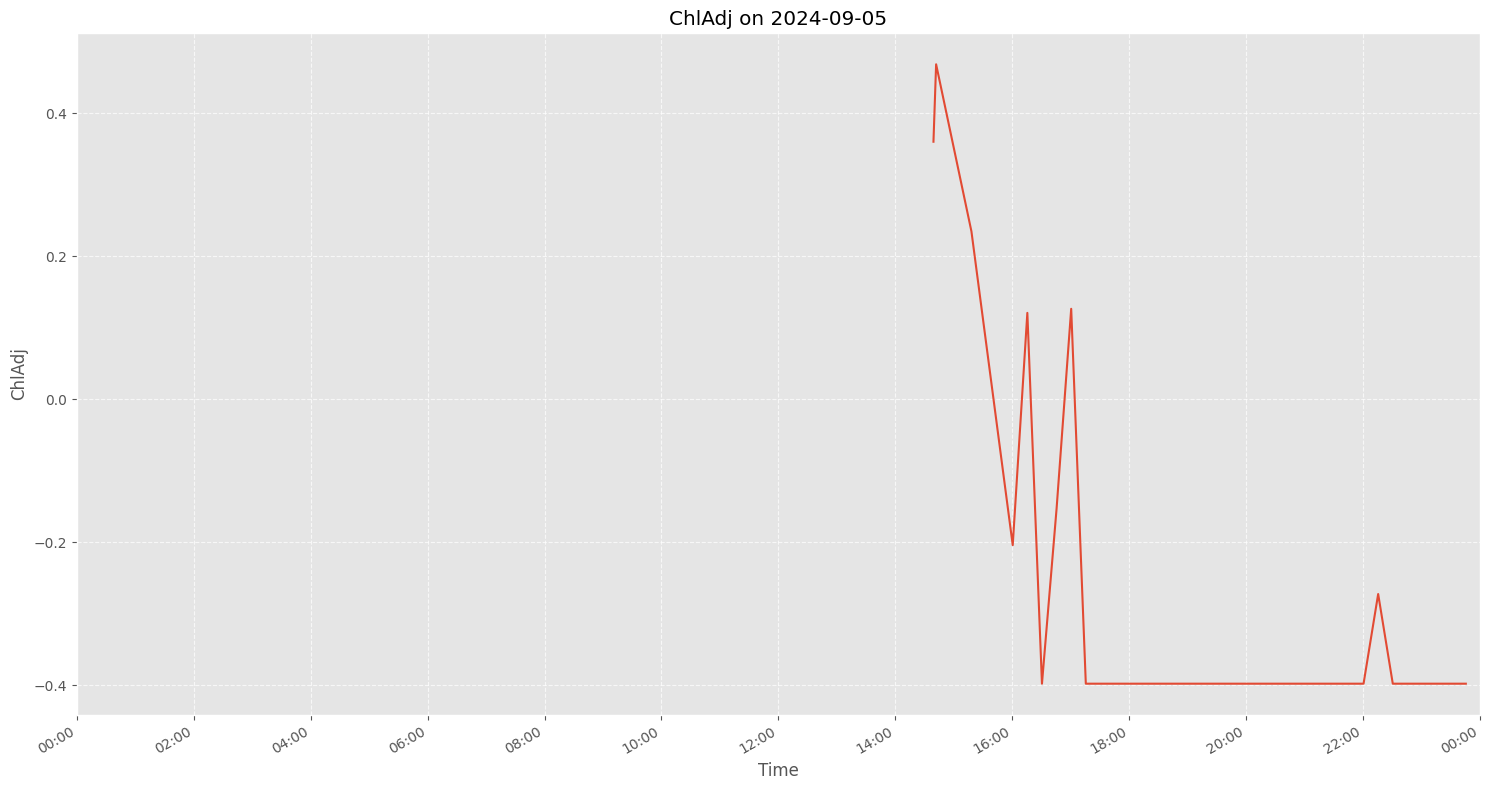

Graph created for 2024-09-05


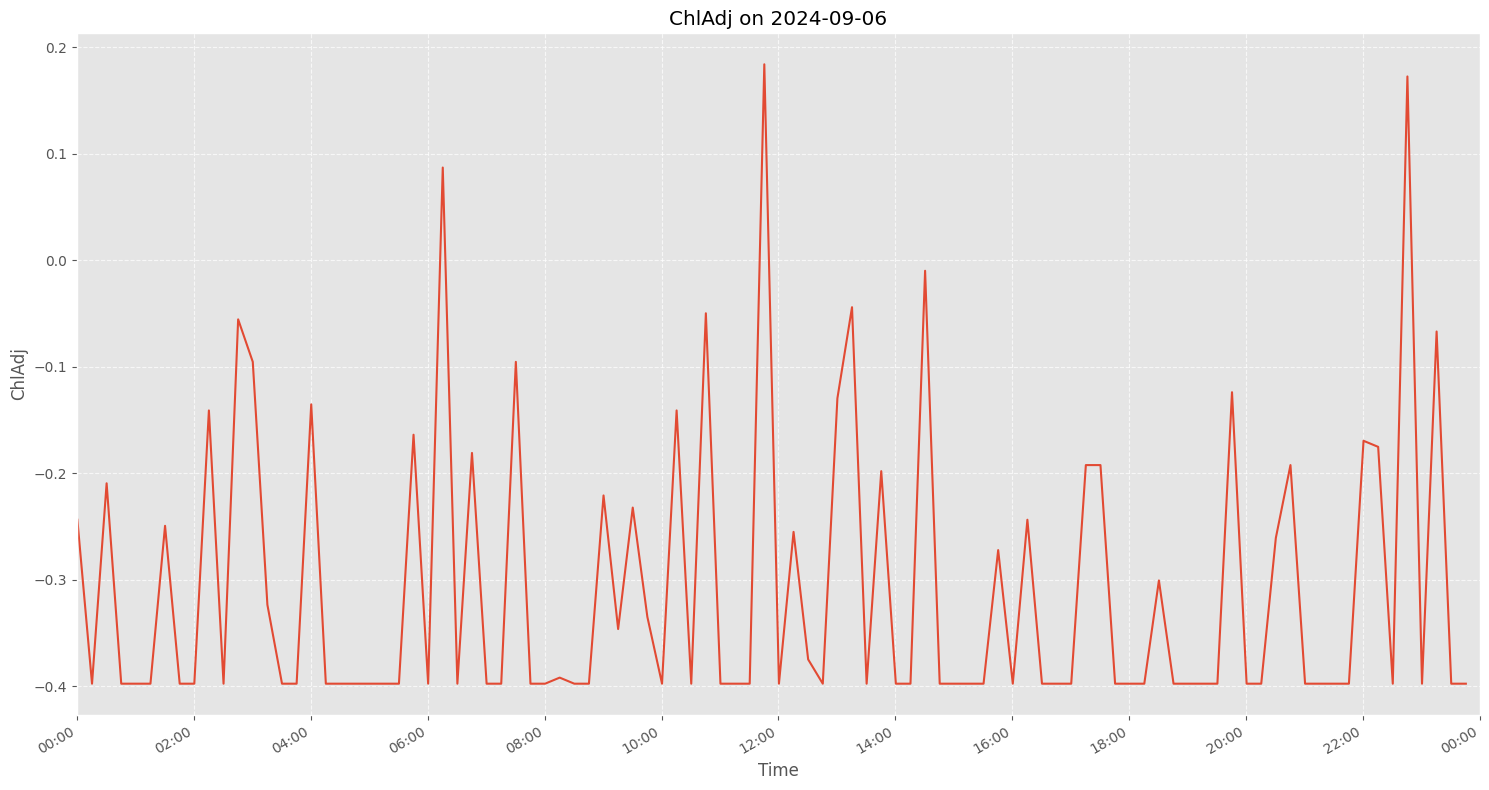

Graph created for 2024-09-06


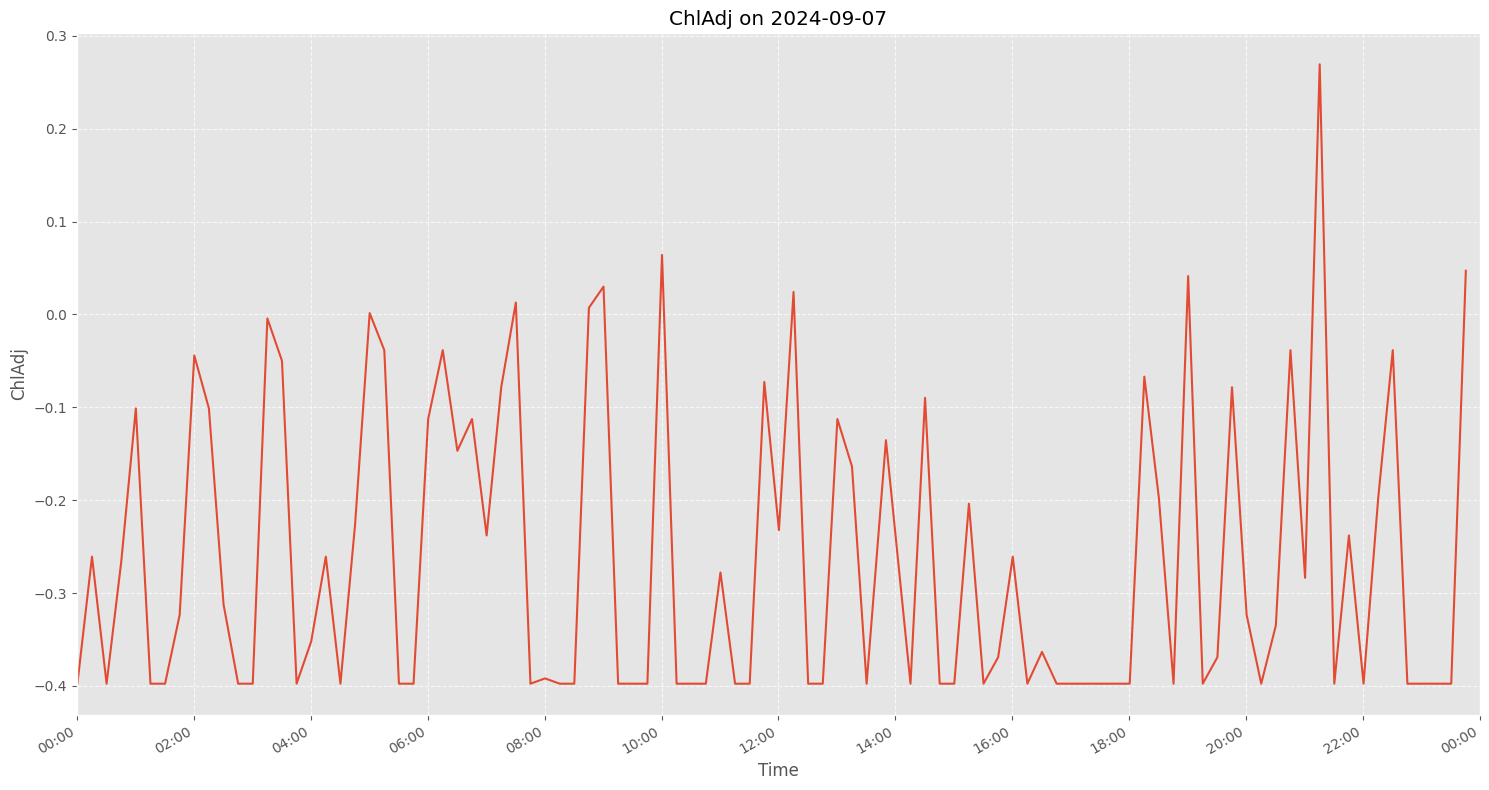

Graph created for 2024-09-07


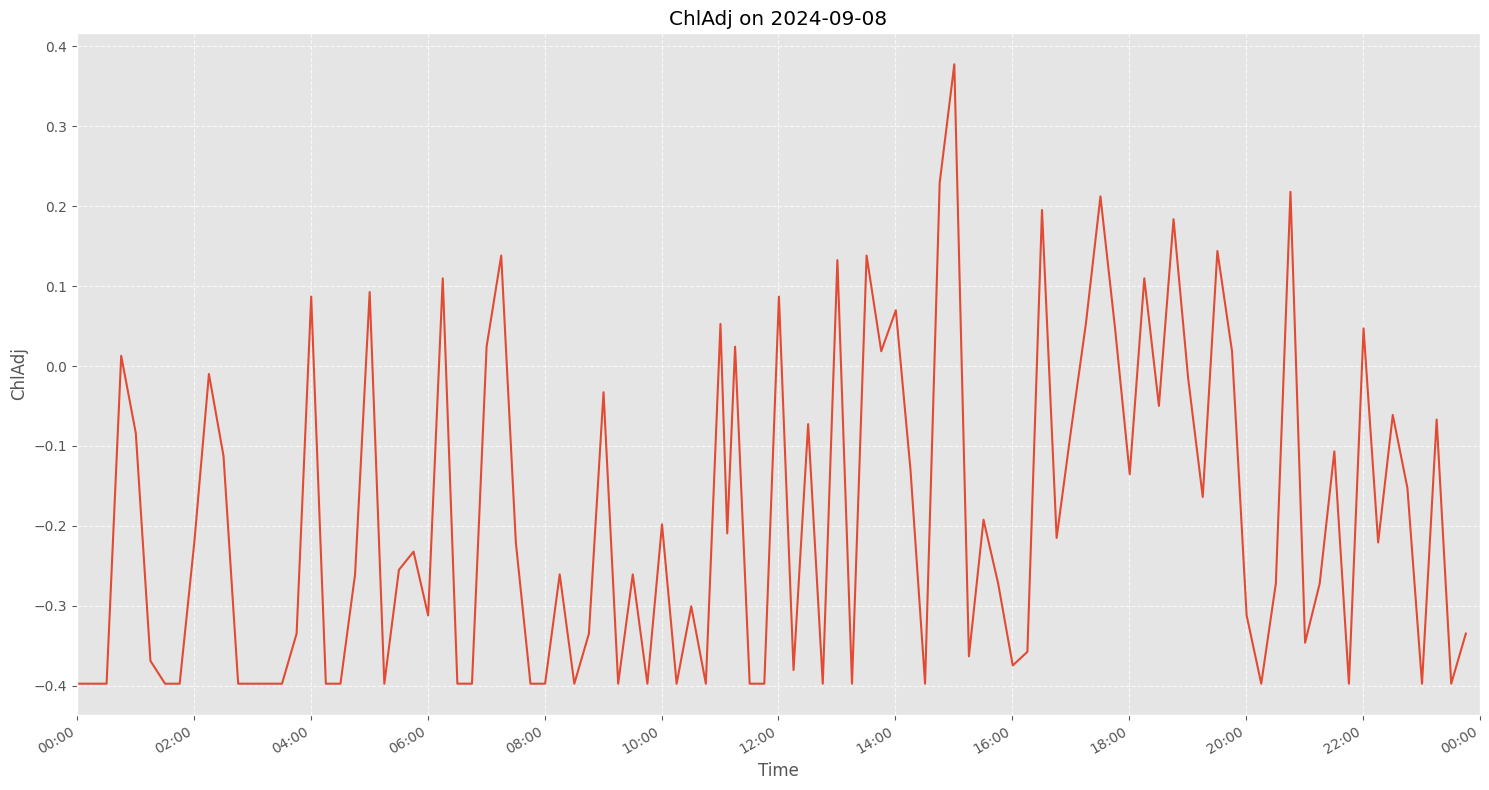

Graph created for 2024-09-08


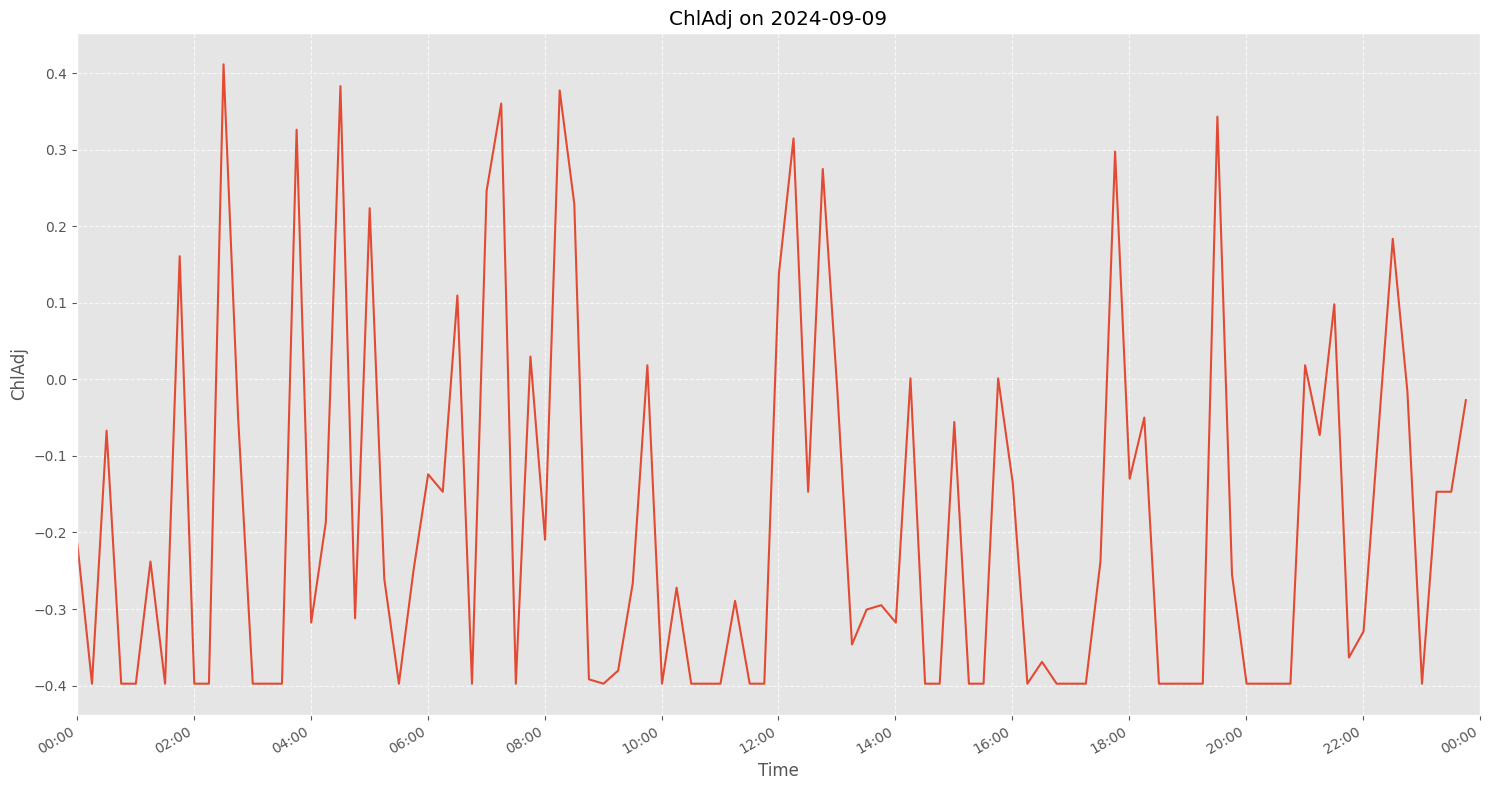

Graph created for 2024-09-09


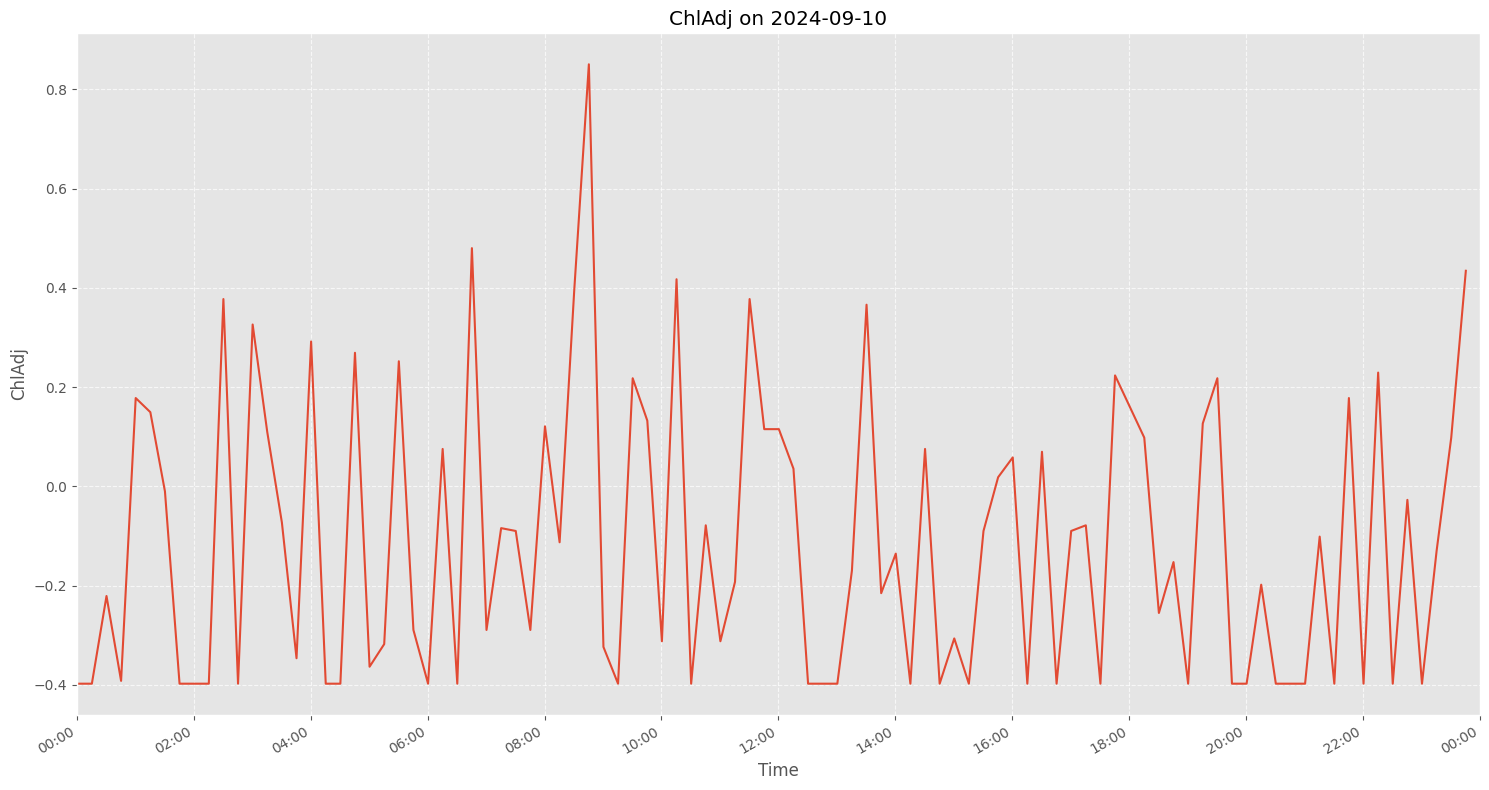

Graph created for 2024-09-10


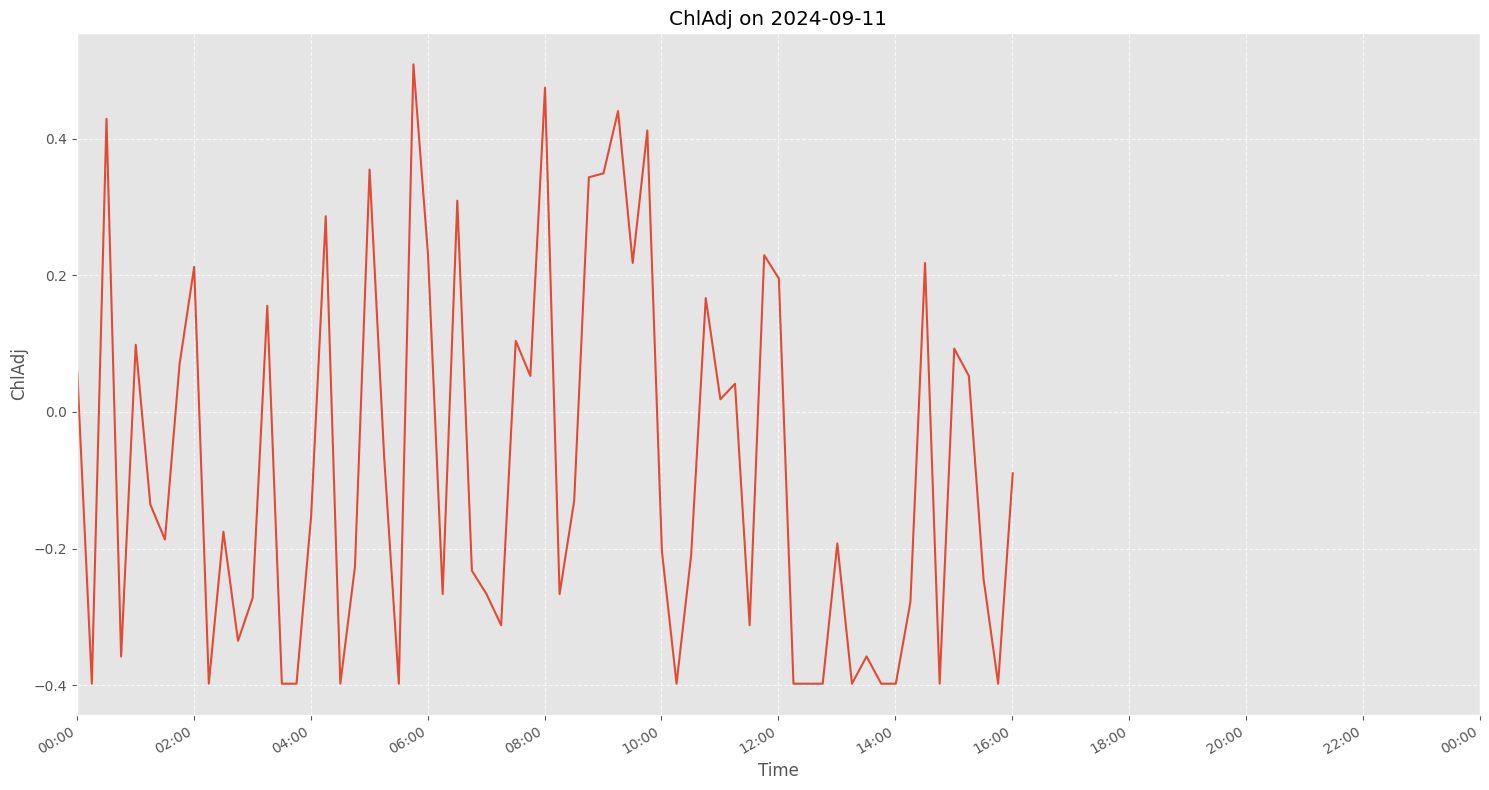

Graph created for 2024-09-11
All daily ChlAdj graphs created and displayed.

Overall statistics for ChlAdj column:
count    580.000000
mean      -0.199761
std        0.239591
min       -0.397600
25%       -0.397600
50%       -0.300700
75%       -0.049900
max        0.850700
Name: ChlAdj, dtype: float64


In [9]:
# 
print("Columns in the DataFrame:")
print(all_data.columns)

# Find the ChlAdj column (ignoring spaces)
chladj_col = next((col for col in all_data.columns if col.strip() == 'ChlAdj'), None)

if chladj_col:
    print(f"ChlAdj column found as '{chladj_col}'. Proceeding with graph creation.")
    
    # Ensure 'Time' column is datetime
    all_data['Time'] = pd.to_datetime(all_data['Time'], format='%d/%m/%Y %H:%M:%S')
    
    # Group the data by day
    grouped = all_data.groupby(all_data['Time'].dt.date)
    
    # Create a graph for each day
    for date, group in grouped:
        # Create a new figure
        plt.figure(figsize=(15, 8))
        
        # Plot ChlAdj data for the day
        plt.plot(group['Time'], group[chladj_col])
        
        # Set title and labels
        plt.title(f'ChlAdj on {date}')
        plt.xlabel('Time')
        plt.ylabel('ChlAdj')
        
        # Format x-axis
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
        
        # Set x-axis limits to full day
        plt.xlim(date, date + timedelta(days=1))
        
        # Rotate and align the tick labels so they look better
        plt.gcf().autofmt_xdate()
        
        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Show the plot
        plt.tight_layout()
        plt.show()
        
        print(f"Graph created for {date}")
    
    print("All daily ChlAdj graphs created and displayed.")
    
    # Print some overall statistics about the ChlAdj column
    print("\nOverall statistics for ChlAdj column:")
    print(all_data[chladj_col].describe())
else:
    print("Error: 'ChlAdj' column not found in the DataFrame.")
    print("Available columns are:", list(all_data.columns))

KeyError: ' ChlAdj'

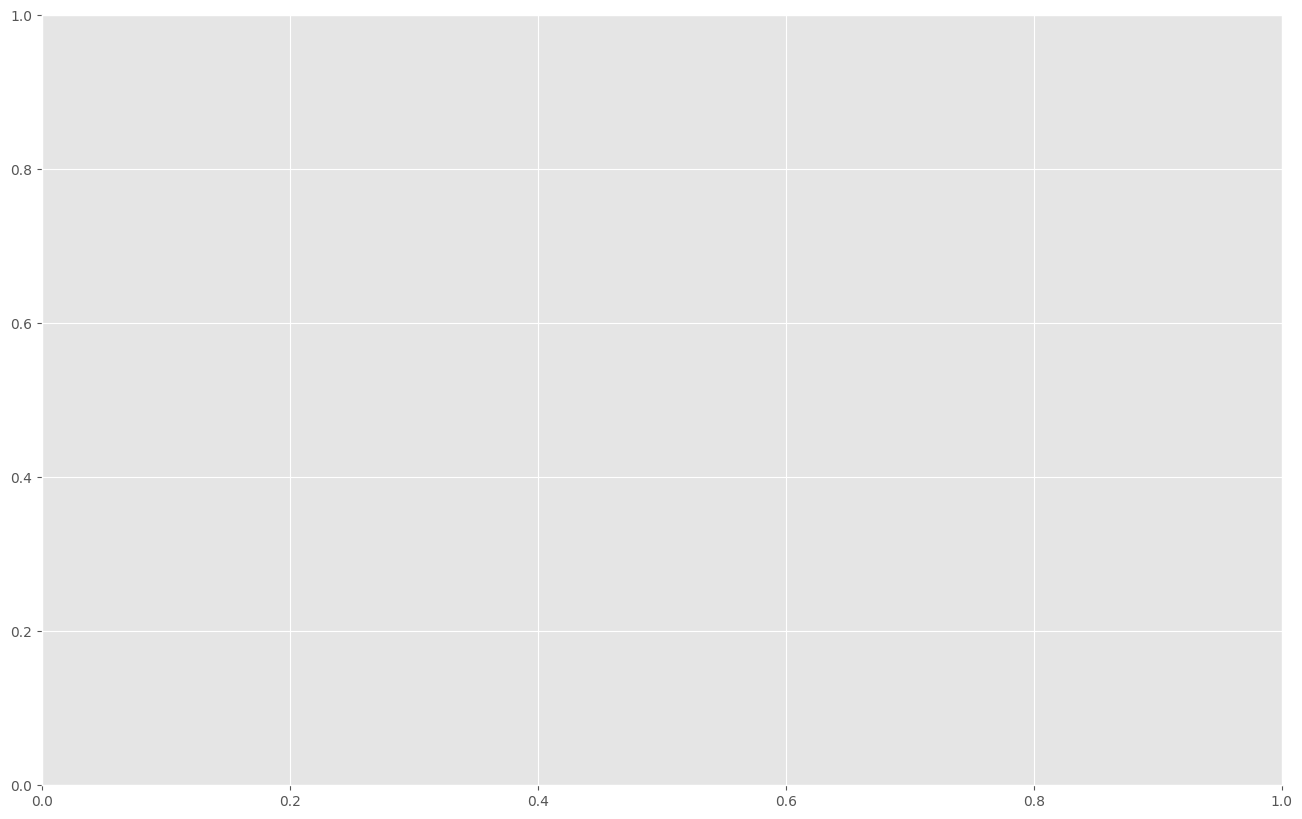

In [11]:
# Set the style to a built-in Matplotlib style
plt.style.use('ggplot')

# Sort data by time
all_data = all_data.sort_values('Time')

# Calculate moving average and standard deviation
window = 4*12  # 24 hours, 4 data points per hour
all_data['MA'] = all_data['ChlAdj'].rolling(window=window, center=True).mean()
all_data['STD'] = all_data['ChlAdj'].rolling(window=window, center=True).std()

# Calculate percentile bands
all_data['Lower_Percentile'] = all_data['ChlAdj'].rolling(window=window, center=True).quantile(0.25)
all_data['Upper_Percentile'] = all_data['ChlAdj'].rolling(window=window, center=True).quantile(0.75)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot raw data
ax.scatter(all_data['Time'], all_data['ChlAdj'], alpha=0.3, s=2, color='#1f77b4', label='Raw Data')

# Plot moving average
ax.plot(all_data['Time'], all_data['MA'], color='#d62728', linewidth=2, label='12-hour Moving Average')

# Plot standard deviation bands
ax.fill_between(all_data['Time'], all_data['MA'] - all_data['STD'], 
                all_data['MA'] + all_data['STD'], alpha=0.2, color='#ff7f0e', 
                label='±1 Std Dev')

# Plot percentile bands
ax.fill_between(all_data['Time'], all_data['Lower_Percentile'], 
                all_data['Upper_Percentile'], alpha=0.2, color='#2ca02c', 
                label='25th-75th Percentile')

# Set title and labels
ax.set_title('Chlorophyll Adjusted (ChlAdj) Time Series Analysis', fontsize=20, pad=20)
ax.set_xlabel('Time', fontsize=14, labelpad=10)
ax.set_ylabel('ChlAdj', fontsize=14, labelpad=10)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Set y-axis limits to focus on the main data range
y_min, y_max = np.percentile(all_data['ChlAdj'], [1, 99])
ax.set_ylim(y_min, y_max)

# Improve legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print some statistics about the data
print("\nData Statistics:")
print(all_data['ChlAdj'].describe())

# Check for NaN values in calculated columns
print("\nNaN count in calculated columns:")
print(all_data[['MA', 'STD', 'Lower_Percentile', 'Upper_Percentile']].isna().sum())